In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings as wr
wr.filterwarnings("ignore")

In [109]:
df=pd.read_csv("mall customers (1).csv")
df.head()
               

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [110]:
df.shape

(200, 5)

In [111]:
df.drop(["CustomerID","Gender"],axis=1,inplace=True)

In [112]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [113]:
df.shape

(200, 3)

In [114]:
df.rename(columns={'Age': 'age', 'Annual Income (k$)':'income', 'Spending Score (1-100)':'score'}, inplace=True)

In [115]:
df.head()

,age,income,score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [116]:
df.shape

(200, 3)

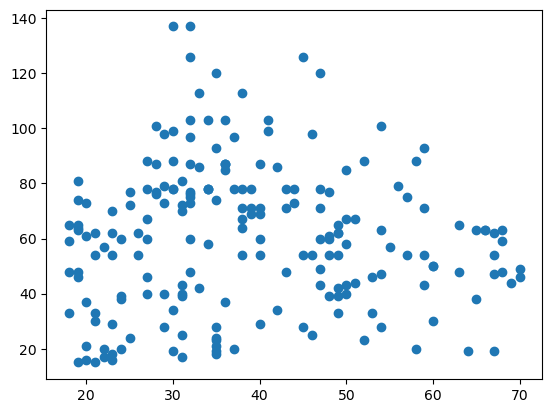

In [117]:
plt.scatter(df.age,df.income)

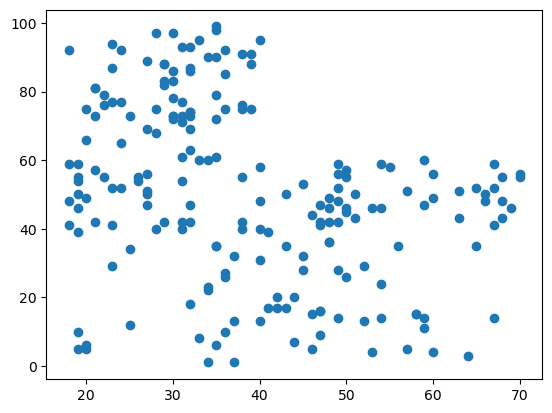

In [118]:
plt.scatter(df.age,df.score)

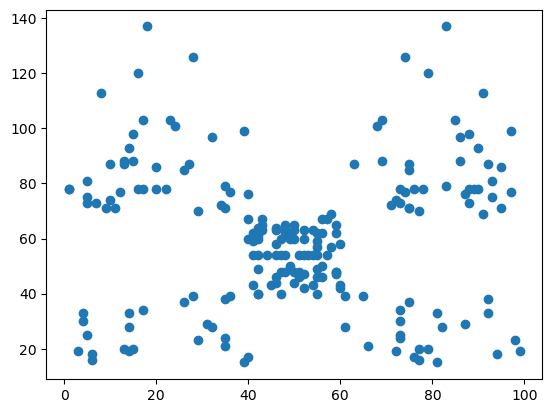

In [119]:
plt.scatter(df.score,df.income)

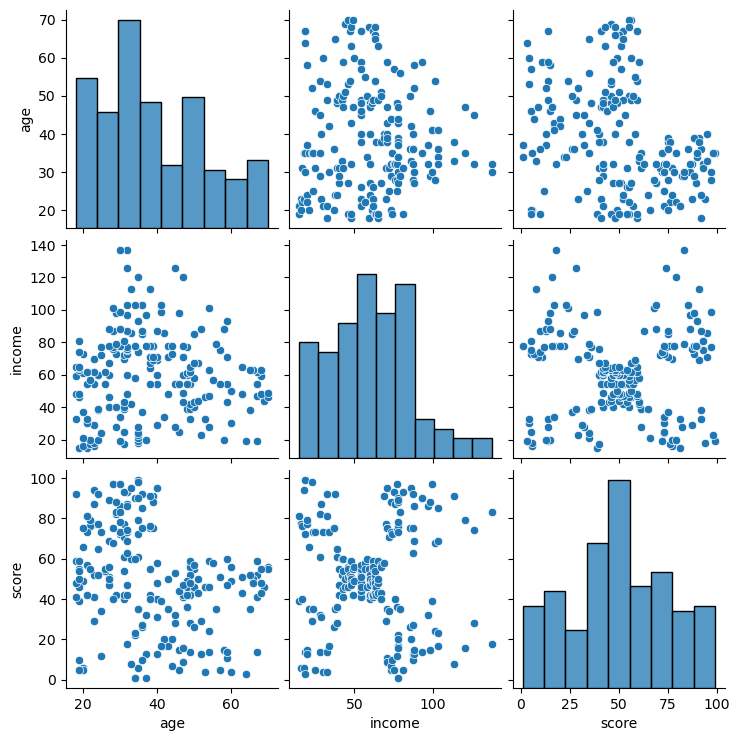

In [120]:
import seaborn as sns
sns.pairplot(df[['age','income','score']])
plt.savefig('image.png')

K_MEANS_CLUSTER

Text(0.5, 1.0, 'income and score plot of customers')

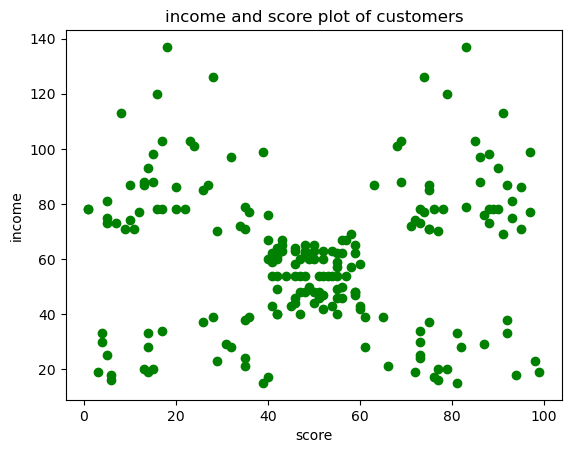

In [121]:
plt.scatter(df.score,df.income,color='green')
plt.xlabel('score')
plt.ylabel('income')
plt.title('income and score plot of customers')

In [122]:
from sklearn.cluster import KMeans

In [123]:
km= KMeans()

In [124]:
km.fit(df[['score','income']])

KMeans()

In [125]:
km.predict(df[['score','income']])

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2, 3, 2, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 2, 2, 7, 7, 2, 2, 2, 2,
       2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 6, 7, 6, 0, 6, 0, 6,
       7, 6, 0, 6, 0, 6, 0, 6, 0, 6, 7, 6, 0, 6, 7, 6, 0, 6, 0, 6, 0, 6,
       0, 6, 0, 6, 0, 6, 7, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6,
       0, 6, 0, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1])

In [126]:
km.cluster_centers_

array([[ 12.68181818,  80.18181818],
       [ 82.72727273, 108.18181818],
       [ 51.40909091,  47.29545455],
       [ 80.04761905,  25.0952381 ],
       [ 19.52380952,  25.14285714],
       [ 22.        , 109.7       ],
       [ 81.89285714,  78.03571429],
       [ 46.1627907 ,  63.72093023]])

In [127]:
df['Group1']=km.predict(df[['score','income']])
df.head()

,age,income,score,Group1
0,19,15,39,4
1,21,15,81,3
2,20,16,6,4
3,23,16,77,3
4,31,17,40,4


In [128]:
df.tail()

,age,income,score,Group1
195,35,120,79,1
196,45,126,28,5
197,32,126,74,1
198,32,137,18,5
199,30,137,83,1


In [129]:
df0 = df[df.Group1== 0]
df1 = df[df.Group1== 1]
df2 = df[df.Group1== 2]
df3 = df[df.Group1== 3]
df4 = df[df.Group1== 4]
df5 = df[df.Group1== 5]
df6 = df[df.Group1== 6]
df7 = df[df.Group1== 7]

In [130]:
df0.head()

,age,income,score,Group1
128,59,71,11,0
130,47,71,9,0
134,20,73,5,0
136,44,73,7,0
138,19,74,10,0


In [131]:
df0.shape

(22, 4)

In [132]:
centroid=km.cluster_centers_

In [133]:
centroid

array([[ 12.68181818,  80.18181818],
       [ 82.72727273, 108.18181818],
       [ 51.40909091,  47.29545455],
       [ 80.04761905,  25.0952381 ],
       [ 19.52380952,  25.14285714],
       [ 22.        , 109.7       ],
       [ 81.89285714,  78.03571429],
       [ 46.1627907 ,  63.72093023]])

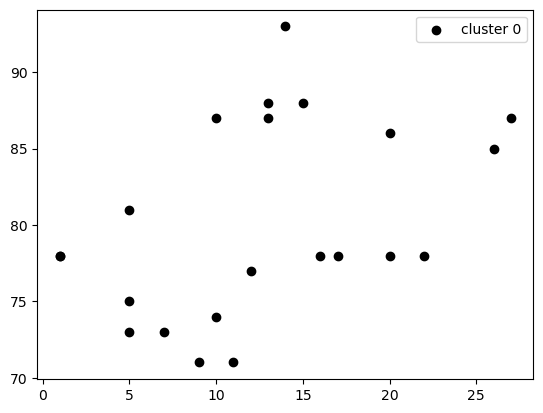

In [134]:
plt.scatter(df0.score,df0.income,color='black',label='cluster 0')
plt.legend()

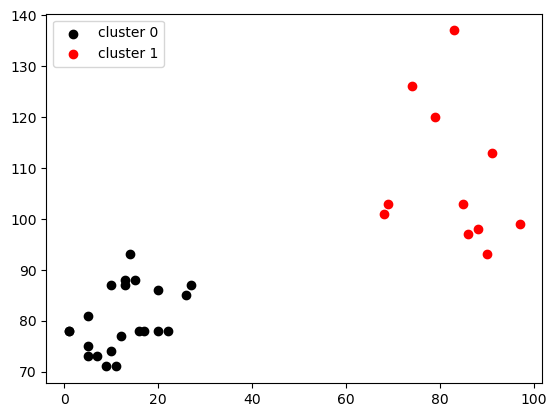

In [135]:
plt.scatter(df0.score,df0.income,color='black',label='cluster 0')
plt.scatter(df1.score,df1.income,color='red',label='cluster 1')
plt.legend()

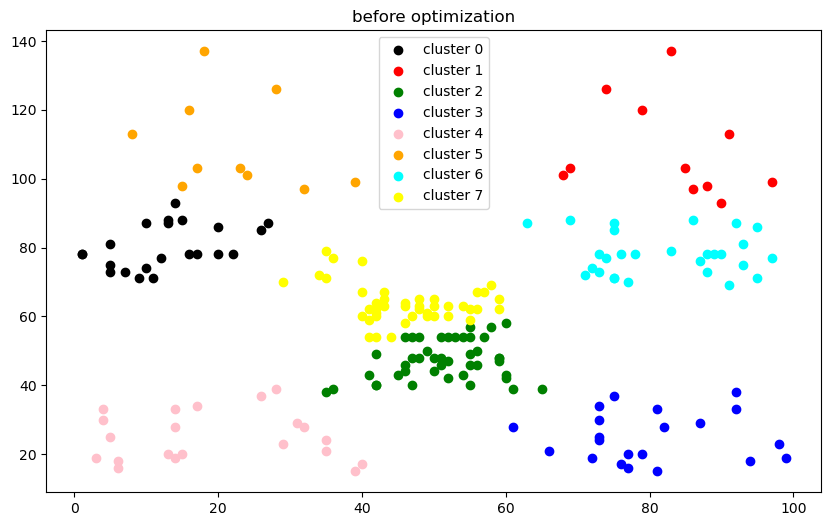

In [136]:
plt.figure(figsize=(10,6))

plt.scatter(df0.score,df0.income,color='black',label='cluster 0')
plt.scatter(df1.score,df1.income,color='red',label='cluster 1')
plt.scatter(df2.score,df2.income,color='green',label='cluster 2')
plt.scatter(df3.score,df3.income,color='blue',label='cluster 3')
plt.scatter(df4.score,df4.income,color='pink',label='cluster 4')
plt.scatter(df5.score,df5.income,color='orange',label='cluster 5')
plt.scatter(df6.score,df6.income,color='cyan',label='cluster 6')
plt.scatter(df7.score,df7.income,color='yellow',label='cluster 7')
plt.title("before optimization")
plt.legend()
           

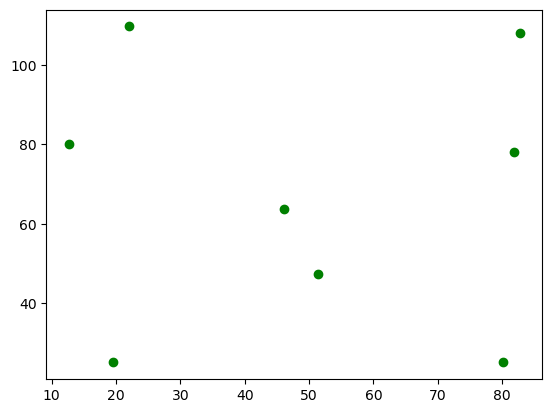

In [137]:
plt.scatter(centroid[:,0],centroid[:,1],color='green',label='centroid')

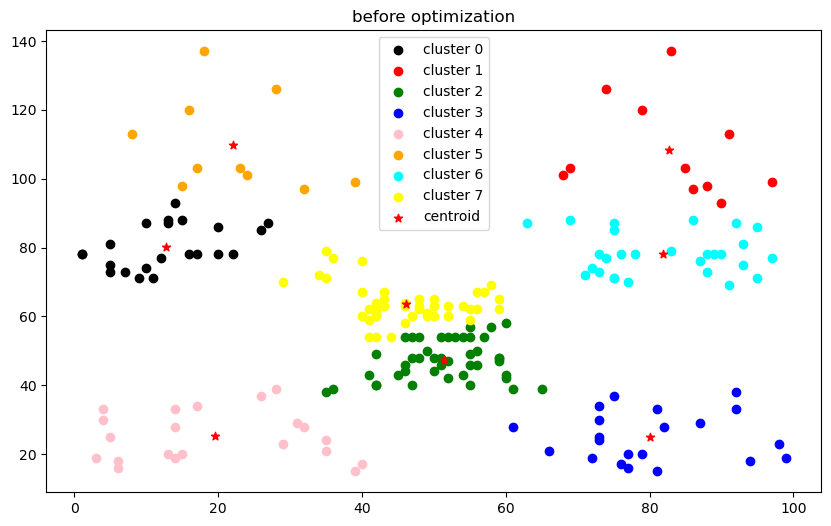

In [138]:
plt.figure(figsize=(10,6))

plt.scatter(df0.score,df0.income,color='black',label='cluster 0')
plt.scatter(df1.score,df1.income,color='red',label='cluster 1')
plt.scatter(df2.score,df2.income,color='green',label='cluster 2')
plt.scatter(df3.score,df3.income,color='blue',label='cluster 3')
plt.scatter(df4.score,df4.income,color='pink',label='cluster 4')
plt.scatter(df5.score,df5.income,color='orange',label='cluster 5')
plt.scatter(df6.score,df6.income,color='cyan',label='cluster 6')
plt.scatter(df7.score,df7.income,color='yellow',label='cluster 7')
plt.scatter(centroid[:,0],centroid[:,1],color='red',label='centroid',marker='*')
plt.title("before optimization")
plt.legend()

In [139]:
km.inertia_

25022.485004530354

In [140]:
#optimization Kmeans

In [141]:
wcss=[]
cluster= range(1,15)
for k in range(1,15):
    km2= KMeans(n_clusters=k)
    km2.fit(df[['score','income']])
    wcss.append(km2.inertia_)
    

In [142]:
wcss

[269981.28,
 182440.30762987013,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37233.81451071001,
 31605.86838023088,
 26136.05484119144,
 22824.403601237012,
 20287.442785218467,
 19744.950969774905,
 16399.096947545208,
 15479.361202413147,
 14344.779878618114]

Text(0.5, 0, 'cluster')

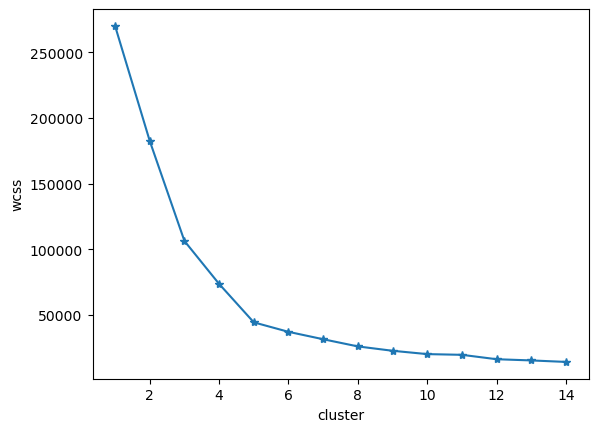

In [143]:
plt.plot(range(1,15),wcss, marker='*')
plt.ylabel('wcss')
plt.xlabel('cluster')

In [156]:
!pip install kneed


Defaulting to user installation because normal site-packages is not writeable


In [158]:
from kneed import KneeLocator

In [159]:
kn = KneeLocator(cluster, wcss, direction='decreasing', curve='convex')

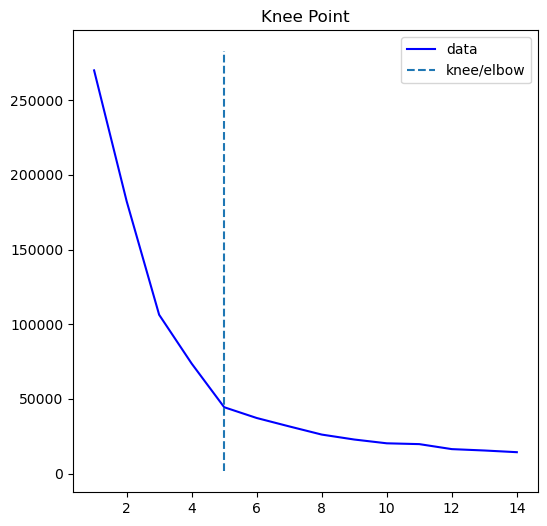

In [160]:
kn.plot_knee()

In [161]:
print('optimal number of class is=',kn.knee)

optimal number of class is= 5


In [ ]:
#After optimization

In [162]:
km=KMeans(n_clusters=5)
df['Group2']=km.fit_predict(df[['score','income']])

In [163]:
df.head()

,age,income,score,Group1,Group2
0,19,15,39,4,4
1,21,15,81,3,0
2,20,16,6,4,4
3,23,16,77,3,0
4,31,17,40,4,4


In [164]:
cen=km.cluster_centers_
cen

array([[79.36363636, 25.72727273],
       [17.11428571, 88.2       ],
       [82.12820513, 86.53846154],
       [49.51851852, 55.2962963 ],
       [20.91304348, 26.30434783]])

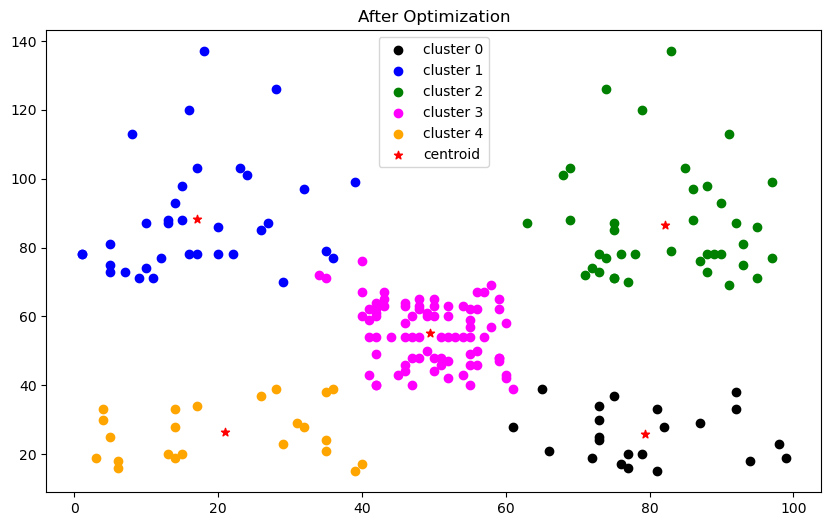

In [165]:
df0 = df[df.Group2 == 0]
df1 = df[df.Group2 == 1]
df2 = df[df.Group2 == 2]
df3 = df[df.Group2 == 3]
df4 = df[df.Group2 == 4]

plt.figure(figsize=(10,6))
plt.scatter(df0.score, df0.income, color='black', label='cluster 0')
plt.scatter(df1.score, df1.income, color='blue', label='cluster 1')
plt.scatter(df2.score, df2.income, color='green', label='cluster 2')
plt.scatter(df3.score, df3.income, color='magenta', label='cluster 3')
plt.scatter(df4.score, df4.income, color='orange', label='cluster 4')

plt.scatter(cen[:, 0], cen[:,1], color='red', label='centroid', marker='*')
plt.title('After Optimization')

plt.legend()